In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_blobs(centers=2, random_state=0)

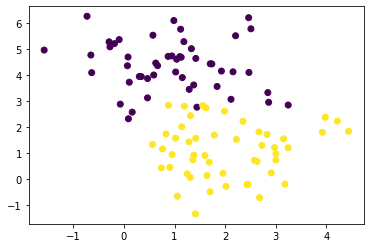

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
class CustomLogisticRegression:
    
    # constructor
    def __init__(self, lr=0.01, iters=20):
        # _ implies private
        self._lr = lr
        self._iters = iters
    
    # Fit function, where training will happen
    def fit(self, X, y):
        # Convert 1d to 2d array for compatibility
        self._y = y.reshape(-1,1)
        # Append a verical stack of ones to X
        X_mod = np.hstack([np.ones([len(X),1]), X])
        self._X = X_mod
        
        # shape[0] will give number of rows in array
        # shape[1] will give number of columns
        # initially all theta are zero (vertically)
        self._theta = np.zeros([X_mod.shape[1],1])
        
        err = []
        for i in range(self._iters):
            err.append(self.error())
            self.gradient_ascend()
        
        # _ after indicates created during training
        self.theta_ = self._theta
        return err
    
    def gradient_ascend(self):
        delta_theta = self.gradient()
        # print(delta_theta.shape)  # (3,1)
        self._theta -= delta_theta
    
    def gradient(self):
        yh = self.hypothesis(self._X)
        # print (yh.shape) # (100,1)
        ya = self._y
        diff = -(ya - yh) # (100,1) # here i have taken -ve of log likelyhood, hence gradiet descent 
        return np.dot(self._X.T, diff) * self._lr # (3,1) # for every feature, sum(diff * ith example)
    
    def hypothesis(self, X):
        prod = np.dot(X, self._theta)
        # print(X.shape) # (100,3)        
        # print(self.__theta.shape) # (3,1)
        # print(prod.shape) # (100,1)
        return 1 / (1 + np.exp(-prod))
    
    def error(self):
        yh = self.hypothesis(self._X)
        ya = self._y
        # log likelihood
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
        # print(ll.shape) # (100, 1)
        # negative log likelihood
        return -np.mean(ll)
    
    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)
    
    def confusion_matrix(self, X, y):
        yp = self.predict(X)
        
        tp = np.mean((y==1) & (yp==1))
        tn = np.mean((y==0) & (yp==0))
        fp = np.mean((y==0) & (yp==1))
        fn = np.mean((y==1) & (yp==0))
        
        return np.array([[tp, fp], [fn, tn]])

In [5]:
model = CustomLogisticRegression()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)


In [7]:
err = model.fit(X_train, y_train)

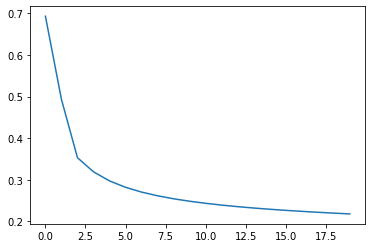

In [8]:
plt.plot(err)

In [9]:
model.theta_ # in order of Theta 0(intercept) , Theta 1, Theta 2(coefficients)

array([[ 0.71194608],
       [ 1.17525229],
       [-1.1967875 ]])

In [10]:
model.score(X_test, y_test)

0.8787878787878788

In [11]:
x1_sample = np.linspace(-1,4)

In [12]:
colors = ["red","blue"]
y_colors = list(map(lambda c: colors[c],y))

In [13]:
model.coef_ = np.array(model.theta_[1:]).T

In [14]:
model.coef_

array([[ 1.17525229, -1.1967875 ]])

In [15]:
model.intercept_ = np.array(model.theta_[0])

In [16]:
model.intercept_

array([0.71194608])

In [17]:
model.coef_, model.intercept_

(array([[ 1.17525229, -1.1967875 ]]), array([0.71194608]))

In [18]:
model.coef_.shape

(1, 2)

In [19]:
model.intercept_.shape

(1,)

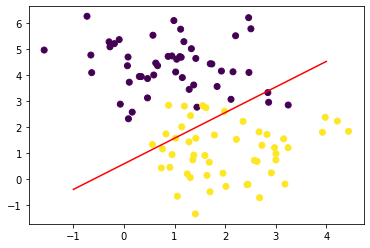

In [20]:
plt.scatter(X[:,0], X[:,1], c=y)

for i, (coef, intercept) in enumerate(zip(model.coef_,model.intercept_)):
    x2_sample = -coef[0]/coef[1] * x1_sample - intercept/coef[1]
    plt.plot(x1_sample, x2_sample, color=colors[i])

In [21]:
model.confusion_matrix(X_test,y_test)

array([[0.51515152, 0.        ],
       [0.12121212, 0.36363636]])